<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

In [1]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
# from pylab import mpl, plt
from matplotlib.pylab import mpl, plt

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

### Real World Data

In [3]:
import pandas as pd

In [4]:
raw = pd.read_csv('tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True).dropna()

In [5]:
symbols = ['SPY', 'GLD', 'AAPL.O', 'MSFT.O']

In [6]:
data = raw[symbols]
data = data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     2138 non-null   float64
 1   GLD     2138 non-null   float64
 2   AAPL.O  2138 non-null   float64
 3   MSFT.O  2138 non-null   float64
dtypes: float64(4)
memory usage: 83.5 KB


In [8]:
data.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,113.33,109.80,30.572827,30.950
2010-01-05,113.63,109.70,30.625684,30.960
2010-01-06,113.71,111.51,30.138541,30.770
2010-01-07,114.19,110.82,30.082827,30.452
2010-01-08,114.57,111.37,30.282827,30.660


<AxesSubplot:xlabel='Date'>

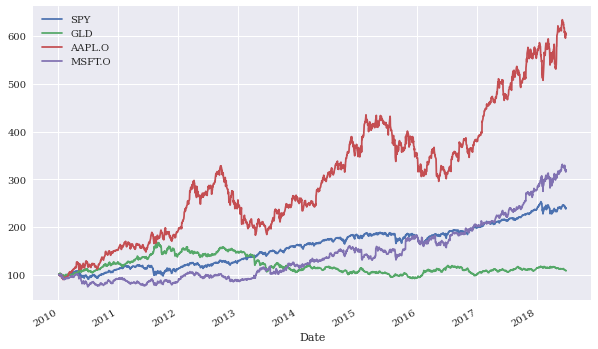

In [9]:
(data / data.iloc[0] * 100).plot(figsize=(10, 6))


In [10]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.002644,-0.000911,0.001727,0.000323
2010-01-06,0.000704,0.016365,-0.016034,-0.006156
2010-01-07,0.004212,-0.006207,-0.001850,-0.010389
2010-01-08,0.003322,0.004951,0.006626,0.006807


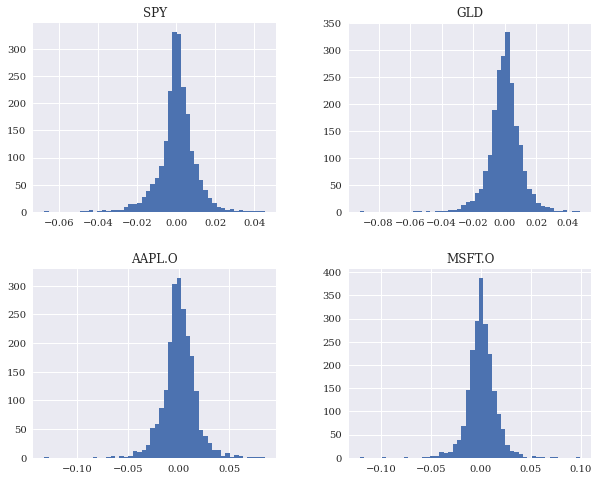

In [11]:
log_returns.hist(bins=50, figsize=(10, 8));
# plt.savefig('../../images/ch13/stat_08.png');

In [12]:
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))

In [13]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)  



Results for symbol SPY
------------------------------
     statistic           value
------------------------------
          size      2137.00000
           min        -0.06734
           max         0.04545
          mean         0.00041
           std         0.00933
          skew        -0.52189
      kurtosis         4.52432

Results for symbol GLD
------------------------------
     statistic           value
------------------------------
          size      2137.00000
           min        -0.09191
           max         0.04795
          mean         0.00004
           std         0.01020
          skew        -0.59934
      kurtosis         5.68423

Results for symbol AAPL.O
------------------------------
     statistic           value
------------------------------
          size      2137.00000
           min        -0.13187
           max         0.08502
          mean         0.00084
           std         0.01591
          skew        -0.23510
      kurtosis         4.7

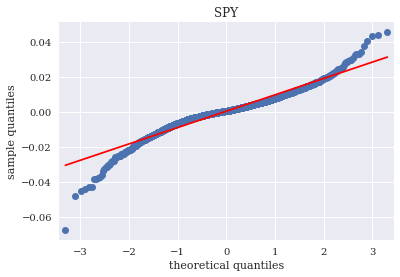

In [14]:
sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.title('SPY')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');
# plt.savefig('../../images/ch13/stat_09.png');

## Portfolio Optimization

### The Data

In [15]:
symbols = ['AAPL.O', 'MSFT.O', 'SPY', 'GLD']  

In [16]:
noa = len(symbols)  

In [17]:
data = raw[symbols]

In [18]:
rets = np.log(data / data.shift(1))

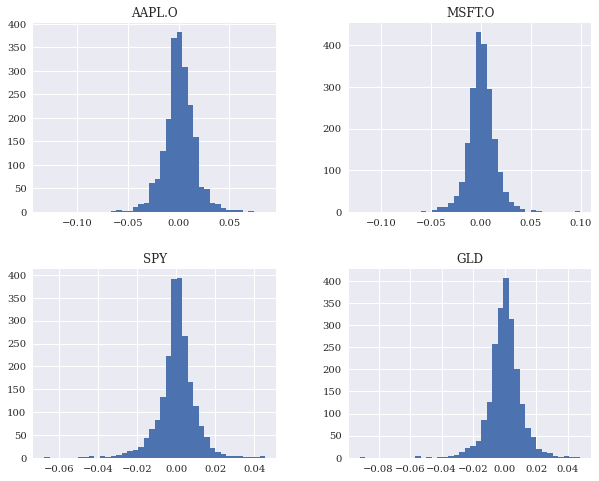

In [19]:
rets.hist(bins=40, figsize=(10, 8));


In [20]:
rets.mean() * 252  

AAPL.O    0.212359
MSFT.O    0.136648
SPY       0.102928
GLD       0.009141
dtype: float64

In [21]:
rets.cov() * 252

,AAPL.O,MSFT.O,SPY,GLD
AAPL.O,0.063773,0.023427,0.021039,0.001513
MSFT.O,0.023427,0.050917,0.022244,-0.000347
SPY,0.021039,0.022244,0.021939,0.000062
GLD,0.001513,-0.000347,0.000062,0.026209


### The Basic Theory

In [22]:
weights = np.random.random(noa)  
weights /= np.sum(weights)  

In [23]:
weights

array([0.33803167, 0.09795833, 0.39068979, 0.1733202 ])

In [24]:
weights.sum()

0.9999999999999999

In [25]:
np.sum(rets.mean() * weights) * 252  

0.12696726598274355

In [26]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))  

0.020896553593248345

In [27]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))  

0.14455640280958967

In [28]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [29]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [30]:
prets = []
pvols = []
for p in range (2500):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)

/var/folders/bh/t4pmhqqn52n_y66q9mqwj6pw0000gn/T/ipykernel_6809/3843745508.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe ratio');


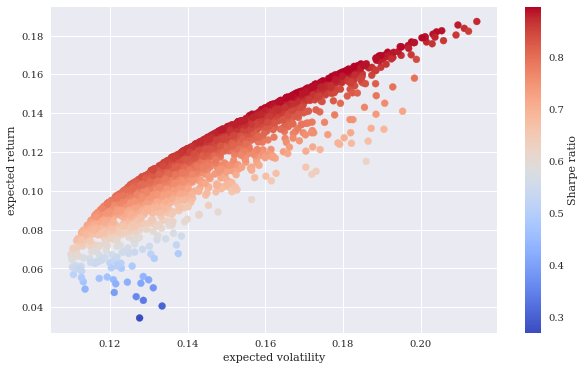

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');
# plt.savefig('../../images/ch13/stat_12.png')

### Portfolio Optimizations

In [32]:
import scipy.optimize as sco

In [33]:
def min_func_sharpe(weights):  
    return -port_ret(weights) / port_vol(weights)  

In [34]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  

In [35]:
bnds = tuple((0, 1) for x in range(noa))  

In [36]:
eweights = np.array(noa * [1. / noa,])  
eweights  

array([0.25, 0.25, 0.25, 0.25])

In [37]:
min_func_sharpe(eweights)

-0.8436203363155398

In [38]:
%%time
opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)  

CPU times: user 57.7 ms, sys: 4.23 ms, total: 61.9 ms
Wall time: 60.2 ms


In [39]:
opts  

     fun: -0.8976673894146999
     jac: array([ 8.96602869e-05,  8.30516219e-05, -2.45943666e-04,  1.92895532e-05])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.51191351, 0.19126413, 0.25454111, 0.04228125])

In [40]:
opts['x'].round(3)  

array([0.512, 0.191, 0.255, 0.042])

In [41]:
port_ret(opts['x']).round(3)  

0.161

In [42]:
port_vol(opts['x']).round(3)  

0.18

In [43]:
port_ret(opts['x']) / port_vol(opts['x'])  

0.8976673894146999

In [44]:
optv = sco.minimize(port_vol, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)  

In [45]:
optv

     fun: 0.10942155263392025
     jac: array([0.11098004, 0.10948556, 0.10939826, 0.10944918])
 message: 'Optimization terminated successfully'
    nfev: 45
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.        , 0.00106171, 0.54326308, 0.45567521])

In [46]:
optv['x'].round(3)

array([0.   , 0.001, 0.543, 0.456])

In [47]:
port_vol(optv['x']).round(3)

0.109

In [48]:
port_ret(optv['x']).round(3)

0.06

In [49]:
port_ret(optv['x']) / port_vol(optv['x'])

0.5504173670813887

### Efficient Frontier

In [50]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  

In [51]:
bnds = tuple((0, 1) for x in weights)

In [52]:
%%time
trets = np.linspace(0.05, 0.2, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
                       bounds=bnds, constraints=cons)  
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 3.55 s, sys: 86.2 ms, total: 3.64 s
Wall time: 3.79 s


/var/folders/bh/t4pmhqqn52n_y66q9mqwj6pw0000gn/T/ipykernel_6809/2759402889.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe ratio')


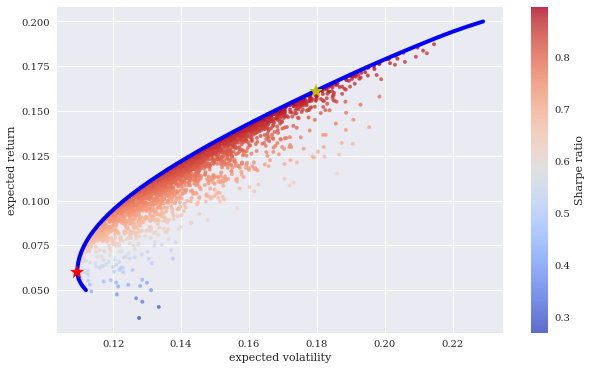

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
         'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
         'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# plt.savefig('../../images/ch13/stat_13.png')

### Capital Market Line

In [54]:
import scipy.interpolate as sci

In [55]:
ind = np.argmin(tvols)  
evols = tvols[ind:]  
erets = trets[ind:]  

In [56]:
tck = sci.splrep(evols, erets)  

In [57]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [58]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]  
    eq2 = rf + p[1] * p[2] - f(p[2])  
    eq3 = p[1] - df(p[2])  
    return eq1, eq2, eq3

In [59]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])  

In [60]:
opt  

array([0.01      , 0.84470952, 0.19525392])

In [61]:
np.round(equations(opt), 6)  

array([ 0.,  0., -0.])

/var/folders/bh/t4pmhqqn52n_y66q9mqwj6pw0000gn/T/ipykernel_6809/1528333178.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Sharpe ratio')


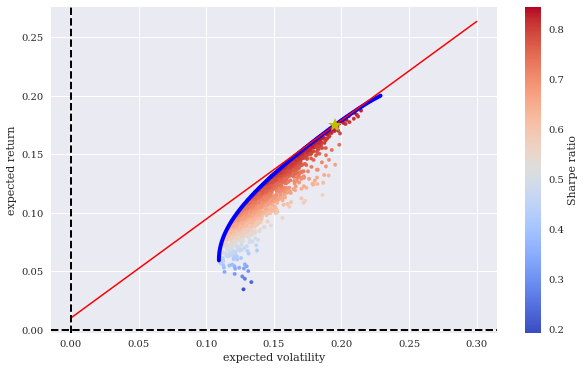

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols,
            marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# plt.savefig('../../images/ch13/stat_14.png')

In [63]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  
res = sco.minimize(port_vol, eweights, method='SLSQP',
                   bounds=bnds, constraints=cons)

In [64]:
res['x'].round(3)  

array([0.59 , 0.221, 0.189, 0.   ])

In [65]:
port_ret(res['x'])

0.17493284333583867

In [66]:
port_vol(res['x'])

0.1952537201232808

In [67]:
port_ret(res['x']) / port_vol(res['x'])

0.8959257894056422

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>